# Basic concepts

This notebook explains the basic concepts of the `helio` framework
* [`FilesIndex`](#FilesIndex)
* [`BatchSampler`](#BatchSampler)
* [`Batch`](#Batch)

and gives usage examples.

## FilesIndex

Usually datasets are large sets of files. Each dataset item can be represented by a single file (e.g. an image) or multiple files (e.g. an image and the corresponding binary mask). `FilesIndex` provides a convenient way to enumerate dataset items as well as to sort, split and filter datasets. Moreover, `FilesIndex` is based on the `pandas.DataFrame` and supports all its features and methods.

To create a `FilesIndex` you need to specify the path to the files to be indexed and give a name to the file set. For illustration, we will work with a set of `.fits` files downloaded from [http://jsoc.stanford.edu/](http://jsoc.stanford.edu/). Let's index all files in the directory `aia193_fits` with the file extension `.fits`. The reference name for this set will be `img`:

In [1]:
import sys
sys.path.append("..")
import warnings
warnings.filterwarnings('ignore') #to ignore the astropy warnings

from helio import FilesIndex

index = FilesIndex(path='../../aia193_fits/*.fits', name='img')
index.head()

,img
FilesIndex,
aia.lev1_euv_12s.2018-12-20T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-20T...
aia.lev1_euv_12s.2018-12-21T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-21T...
aia.lev1_euv_12s.2018-12-22T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-22T...
aia.lev1_euv_12s.2018-12-23T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-23T...
aia.lev1_euv_12s.2018-12-24T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-24T...


Now in the column `images` we have paths to the `.fits` files, while the column `FilesIndex` contains filenames (without extension). Since the `index` is a pandas dataframe, we use `head` to show the first items.

Let's get the dataset size:

In [2]:
len(index)

55

Using the standart methods of the pandas dataframe, one can 
* select a subset, e.g. with `.iloc`

In [3]:
index.iloc[10:12]

,img
FilesIndex,
aia.lev1_euv_12s.2018-12-30T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-30T...
aia.lev1_euv_12s.2018-12-31T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-31T...


* sort items

In [4]:
index.sort_values(by='img').head()

,img
FilesIndex,
aia.lev1_euv_12s.2018-12-20T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-20T...
aia.lev1_euv_12s.2018-12-21T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-21T...
aia.lev1_euv_12s.2018-12-22T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-22T...
aia.lev1_euv_12s.2018-12-23T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-23T...
aia.lev1_euv_12s.2018-12-24T234430Z.193.image_lev1,../../aia193_fits\aia.lev1_euv_12s.2018-12-24T...


* modify the index (we will remove a few characters from the string to make it shorter and make it easier to recognize the date and time)

In [5]:
index.index = index.index.map(lambda x: x.split('.')[2])
index.head()

,img
FilesIndex,
2018-12-20T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-20T...
2018-12-21T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-21T...
2018-12-22T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-22T...
2018-12-23T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-23T...
2018-12-24T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-24T...


One useful feature of the `FilesIndex` is the datetime parser that extracts date and time from the filename. Note that this method may require some preprocessing (which we already did above) of the string to make it easier to recognize the date and time.

In [6]:
index.parse_datetime().head()

,img,DateTime
FilesIndex,,
2018-12-20T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-20T...,2018-12-20 23:44:30+00:00
2018-12-21T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-21T...,2018-12-21 23:44:30+00:00
2018-12-22T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-22T...,2018-12-22 23:44:30+00:00
2018-12-23T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-23T...,2018-12-23 23:44:30+00:00
2018-12-24T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-24T...,2018-12-24 23:44:30+00:00


`DateTime` column can be used to get basic parameters of the Sun (L0 and B0 angles, and the Carrington rotation number):

In [7]:
index.get_sun_params().head()

,img,DateTime,L0,B0,CR
FilesIndex,,,,,
2018-12-20T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-20T...,2018-12-20 23:44:30+00:00,353.448898,-1.631964,2212
2018-12-21T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-21T...,2018-12-21 23:44:30+00:00,340.275175,-1.756973,2212
2018-12-22T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-22T...,2018-12-22 23:44:30+00:00,327.101705,-1.881456,2212
2018-12-23T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-23T...,2018-12-23 23:44:30+00:00,313.928509,-2.005373,2212
2018-12-24T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-24T...,2018-12-24 23:44:30+00:00,300.755608,-2.128685,2212


The Carrington rotation number can be used to select the files that correspond to the particular rotation number(s):

In [8]:
new_index = index.set_index('CR').loc[[2213]]
new_index.head()

,img,DateTime,L0,B0
CR,,,,
2213,../../aia193_fits\aia.lev1_euv_12s.2019-01-16T...,2019-01-16 23:44:30+00:00,357.856648,-4.707531
2213,../../aia193_fits\aia.lev1_euv_12s.2019-01-17T...,2019-01-17 23:44:30+00:00,344.689145,-4.804793
2213,../../aia193_fits\aia.lev1_euv_12s.2019-01-18T...,2019-01-18 23:44:30+00:00,331.521721,-4.900536
2213,../../aia193_fits\aia.lev1_euv_12s.2019-01-19T...,2019-01-19 23:44:30+00:00,318.354380,-4.994727
2213,../../aia193_fits\aia.lev1_euv_12s.2019-01-20T...,2019-01-20 23:44:30+00:00,305.187132,-5.087337


One more thing to be mentioned is the train/test split of the index. Paramerers of this method are
* `train_ratio` (fraction of the train subset)
* `shuffle` (whether or not to shuffle the data before splitting)
* `seed` (pass an int to reproduce output across multiple calls)

In [9]:
train, test = index.train_test_split(train_ratio=0.8, shuffle=True)
print("Train size:", len(train), "\nTest size:", len(test))
train.head()

Train size: 44 
Test size: 11


,img,DateTime,L0,B0,CR
FilesIndex,,,,,
2018-12-23T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-23T...,2018-12-23 23:44:30+00:00,313.928509,-2.005373,2212
2019-02-11T234430Z,../../aia193_fits\aia.lev1_euv_12s.2019-02-11T...,2019-02-11 23:44:30+00:00,15.526681,-6.670577,2213
2019-02-07T234430Z,../../aia193_fits\aia.lev1_euv_12s.2019-02-07T...,2019-02-07 23:44:30+00:00,68.193501,-6.452585,2213
2018-12-31T234430Z,../../aia193_fits\aia.lev1_euv_12s.2018-12-31T...,2018-12-31 23:44:30+00:00,208.554604,-2.971529,2212
2019-01-18T234430Z,../../aia193_fits\aia.lev1_euv_12s.2019-01-18T...,2019-01-18 23:44:30+00:00,331.521721,-4.900536,2213


## BatchSampler

We use `BatchSampler` to iterate over the dataset in chunks. It becomes useful when dataset is large and does not fit into the memory at once. There are several options how
to organize iterations. For demonstration, we create a small dataset with integer indices:

In [10]:
dindex = index.iloc[:6].reset_index(drop=True)
dindex

,img,DateTime,L0,B0,CR
0,../../aia193_fits\aia.lev1_euv_12s.2018-12-20T...,2018-12-20 23:44:30+00:00,353.448898,-1.631964,2212
1,../../aia193_fits\aia.lev1_euv_12s.2018-12-21T...,2018-12-21 23:44:30+00:00,340.275175,-1.756973,2212
2,../../aia193_fits\aia.lev1_euv_12s.2018-12-22T...,2018-12-22 23:44:30+00:00,327.101705,-1.881456,2212
3,../../aia193_fits\aia.lev1_euv_12s.2018-12-23T...,2018-12-23 23:44:30+00:00,313.928509,-2.005373,2212
4,../../aia193_fits\aia.lev1_euv_12s.2018-12-24T...,2018-12-24 23:44:30+00:00,300.755608,-2.128685,2212
5,../../aia193_fits\aia.lev1_euv_12s.2018-12-25T...,2018-12-25 23:44:30+00:00,287.583022,-2.251351,2212


The simplest case is to iterate over the dataset with chunks (batches) of a fixed size, e.g. of size 2. At each iteration we obtain a subset of size 2. Here we show indices in each chunk:

In [11]:
from helio import BatchSampler

sampler = BatchSampler(dindex, batch_size=2)

for ids in sampler:
    print(ids.indices)

[0 1]
[2 3]
[4 5]


Sampled index is an instance of `FilesIndex` as well:

In [12]:
ids

,img,DateTime,L0,B0,CR
4,../../aia193_fits\aia.lev1_euv_12s.2018-12-24T...,2018-12-24 23:44:30+00:00,300.755608,-2.128685,2212
5,../../aia193_fits\aia.lev1_euv_12s.2018-12-25T...,2018-12-25 23:44:30+00:00,287.583022,-2.251351,2212


If the `batch_size` does not divide the dataset size, we can either drop incomplete chunks or return incomplete last chunk:

In [13]:
print('Only complete batches are sampled:')
sampler = BatchSampler(dindex, batch_size=4, drop_incomplete=True)
for ids in sampler:
    print(ids.indices)
print('Keep incomplete batches as well:')
sampler = BatchSampler(dindex, batch_size=4, drop_incomplete=False)
for ids in sampler:
    print(ids.indices)

Only complete batches are sampled:
[0 1 2 3]
Keep incomplete batches as well:
[0 1 2 3]
[4 5]


There is an option to shuffle data before iterations:

In [14]:
sampler = BatchSampler(dindex, batch_size=2, shuffle=True)
for ids in sampler:
    print(ids.indices)

[2 5]
[1 4]
[0 3]


Finally, we can iterate the dataset many times (epochs) and shuffle data each new epoch:

In [15]:
sampler = BatchSampler(dindex, n_epochs=2, batch_size=3, shuffle=True)
for ids in sampler:
    print(ids.indices)

[3 2 5]
[4 0 1]
[4 3 2]
[1 0 5]


## Batch 

`HelioBatch` provides a framework for data storing and processing. Use `index` to initialize a batch and `load()` to read data from the files. The parameter `src` specifies which column of the `index` contains the file paths.

In [16]:
from helio import HelioBatch

batch = HelioBatch(dindex)
batch.load(src='img', unit=1) # the keyword unit=1 is required for SDO fits files 

Now the batch items can be accessed by the attribute `img`. Each item is an image of shape

In [17]:
batch.img[0].shape

(4096, 4096)

We can plot arrays using the method `show` :

<AxesSubplot:>

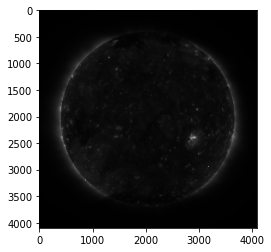

In [18]:
batch.imshow(src='img', i=0, cmap='gray')

Headers of the fits file and some other meta information on the file in stored in the attribute `batch.meta`:

In [19]:
batch.meta['img'][0].keys()

dict_keys(['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'PCOUNT', 'GCOUNT', 'XTENSION', 'T_REC', 'T_OBS', 'WAVELNTH', 'DATE', 'FSN', 'EXPTIME', 'QUALITY', 'ORIGIN', 'TELESCOP', 'INSTRUME', 'DATE-OBS', 'CAMERA', 'IMG_TYPE', 'EXPSDEV', 'INT_TIME', 'WAVEUNIT', 'WAVE_STR', 'FID', 'QUALLEV0', 'TOTVALS', 'DATAVALS', 'MISSVALS', 'PERCENTD', 'DATAMIN', 'DATAMAX', 'DATAMEDN', 'DATAMEAN', 'DATARMS', 'DATASKEW', 'DATAKURT', 'DATACENT', 'DATAP01', 'DATAP10', 'DATAP25', 'DATAP75', 'DATAP90', 'DATAP95', 'DATAP98', 'DATAP99', 'NSATPIX', 'OSCNMEAN', 'OSCNRMS', 'FLAT_REC', 'NSPIKES', 'CTYPE1', 'CUNIT1', 'CRVAL1', 'CDELT1', 'CRPIX1', 'CTYPE2', 'CUNIT2', 'CRVAL2', 'CDELT2', 'CRPIX2', 'CROTA2', 'R_SUN', 'MPO_REC', 'INST_ROT', 'IMSCL_MP', 'X0_MP', 'Y0_MP', 'ASD_REC', 'SAT_Y0', 'SAT_Z0', 'SAT_ROT', 'ACS_MODE', 'ACS_ECLP', 'ACS_SUNP', 'ACS_SAFE', 'ACS_CGT', 'ORB_REC', 'DSUN_REF', 'DSUN_OBS', 'RSUN_REF', 'RSUN_OBS', 'GAEX_OBS', 'GAEY_OBS', 'GAEZ_OBS', 'HAEX_OBS', 'HAEY_OBS', 'HAEZ_OBS', 'OBS_VR', 'OBS_VW'

Now consider working with batch methods. Most methods have `src` and `dst` parameters that specify where to get data and where to write the results. If `dst` is not given, it is assumed that `dst`=`src`. Also one can explicitly set the same values to `src` and `dst` for inplace operations. For example consider image resize. The results will be written to the new attribute: 

In [20]:
batch.resize(src='img', dst='img_resized', output_shape=(256, 256), preserve_range=True)

The new attribute has been created:

In [21]:
batch.attributes

['img', 'img_resized']

The new attribute contains resized data while original data are not lost:

In [22]:
batch.img[0].shape, batch.img_resized[0].shape

((4096, 4096), (256, 256))

One can apply custom function to batch items. For example, apply the log-transformation to the pixel values:

In [23]:
import numpy as np

def log_scale(x):
    return np.log(np.clip(x, 1, None))

batch.apply(log_scale, src='img', dst='img_log')

Let's look at the results:

<AxesSubplot:>

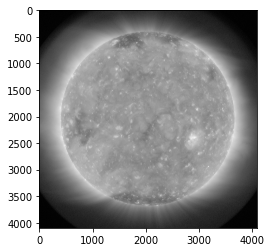

In [24]:
batch.imshow(src='img_log', i=0, cmap='gray')

Each batch method returns batch instance and one can orginize methods chaining:

In [25]:
(HelioBatch(dindex).load(src='img', unit=1)
 .apply(log_scale, src='img', dst='img_log')
 .resize(src='img_log', dst='resized', output_shape=(256, 256), preserve_range=True))

In a combination with `BatchSampler` one can organize iterative dataset processing:

In [26]:
from tqdm import tqdm

sampler = BatchSampler(dindex, n_epochs=1, batch_size=2)

for ids in tqdm(sampler):
    (HelioBatch(ids).load(src='img', unit=1)
     .apply(log_scale, src='img')
     .resize(src='img', output_shape=(256, 256), preserve_range=True)
     .dump(src='img', path='./tmp/', format='jpg', cmap='gray'))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.51s/it]


To learn more about `HelioBatch` methods see the [documentation](http://observethesun.github.io/helio/).

Done!